## Import

In [1]:
import numpy as np
from PIL import Image, ImageOps
from os import listdir
from os.path import isfile, join

## Normalize Image Function

In [2]:
def mean_normalize(img):
    arr = np.ravel(img)
    mean = np.mean(arr)
    arr_1 = []
    for i in range(len(arr)):
        if(arr[i] > mean):
            arr_1.append(1)
        else:
            arr_1.append(0)
#     res = Image.fromarray((np.array(arr_1)).astype(np.uint8))
    return arr_1

## Creating Hash

In [3]:
def create_hash(image_file, hash_size=8):
    image = Image.open(image_file)
    image = image.resize((hash_size, hash_size))
    image = ImageOps.grayscale(image)
    image = mean_normalize(image)
    res = "".join([str(elem) for elem in image])
    hashformat = "0{hashlength}x".format(hashlength=hash_size**2//4)
    return int(res, 2).__format__(hashformat)

## Similarity Check Function

In [4]:
def check(img1, img2, thres):
    v = sum(map(lambda x: 0 if x[0] == x[1] else 1, zip(img1, img2)))
    if v <= thres:
        return True
    else:
        return False

## Images

In [5]:
folderPath = "./hashing_images/"
img_files = [f for f in listdir(folderPath) if isfile(join(folderPath, f))]

## Dictionary of Images and their Hashes

In [6]:
dic = {}
for i in img_files:
    dic[i] = create_hash(folderPath + i)

In [7]:
dic

{'cumulus-cloud.jpg': '1c0c08a1e4fffcff',
 'forest02.jpg': '70271f1e18fa7808',
 'sky02.jpg': '0000003cfefeffff',
 'sky03.jpg': '0203034050ffffff',
 'forest03.jpg': 'fffffffef0000000',
 'forest01.jpg': '181f3f3f1f1b1e00',
 'sky01.jpg': '381cc0e0fcfcffbf'}

## Query Image

In [8]:
d = create_hash(folderPath + 'sky02.jpg')

In [9]:
d

'0000003cfefeffff'

## Result of comparision

In [10]:
for i in dic.keys():
    print(i, check(dic[i], d, 10))

cumulus-cloud.jpg True
forest02.jpg False
sky02.jpg True
sky03.jpg True
forest03.jpg False
forest01.jpg False
sky01.jpg True


## Similar Images

In [11]:
x=[]
for i in dic.keys():
    if check(dic[i], d, 10):
        x.append(i)
print("Similar  images are",x)

Similar  images are ['cumulus-cloud.jpg', 'sky02.jpg', 'sky03.jpg', 'sky01.jpg']


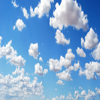

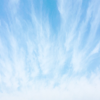

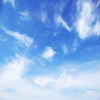

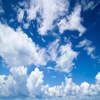

In [12]:
for i in x:
    im = Image.open("hashing_images/" + i)
    im = im.resize((100, 100))
    display(im)

## Dissimilar Images

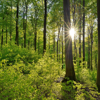

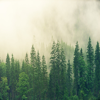

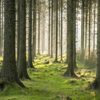

In [13]:
for i in dic.keys():
    if i not in x:
        im = Image.open(folderPath + i)
        im = im.resize((100, 100))
        display(im)

In [ ]:
for i in dic.keys():
    print(i, check(dic[i], d, 10))

In [ ]:
for i in img_files:
    a, v = check(folderPath+i, folderPath+'cumulus-cloud.jpg', 10)
    print(i, a, v)